
The basic descriptive information from orginal datasets
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24066 entries, 0 to 24065
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                24066 non-null  int64 
 1   Jobs                               24066 non-null  object
 2   Type of employment                 24066 non-null  object
 3   Hours currently working per week   24066 non-null  int64 
 4   Capital status                     24066 non-null  int64 
 5   Highest level of education         24066 non-null  object
 6   Completed years of education       24066 non-null  int64 
 7   Marital status                     24066 non-null  object
 8   Relationship inside the household  24066 non-null  object
 9   Ethnic Origin                      


The frequency of the categorical varaiables that already added missing value.
****************************************************************************************************
    
 Adm-clerical         0.175
 Prof-specialty       0.127
 Craft-repair         0.126
 Exec-managerial      0.124
 Sales                0.111
 Other-service        0.102
 Machine-op-inspct    0.061
 Transport-moving     0.049
 Handlers-cleaners    0.041
 Farming-fishing      0.030
 Tech-support         0.029
 Protective-serv      0.021
 Priv-house-serv      0.005
 Armed-Forces         0.000
Name: Jobs, dtype: float64

****************************************************************************************************

 Private             0.737
 Self-emp-not-inc    0.083
 Local-gov           0.068
 State-gov           0.043
 Self-emp-inc        0.037
 Federal-gov         0.031
 Without-pay         0.000
 Never-worked        0.000
Name: Type of employment, dtype: float64

***********************************

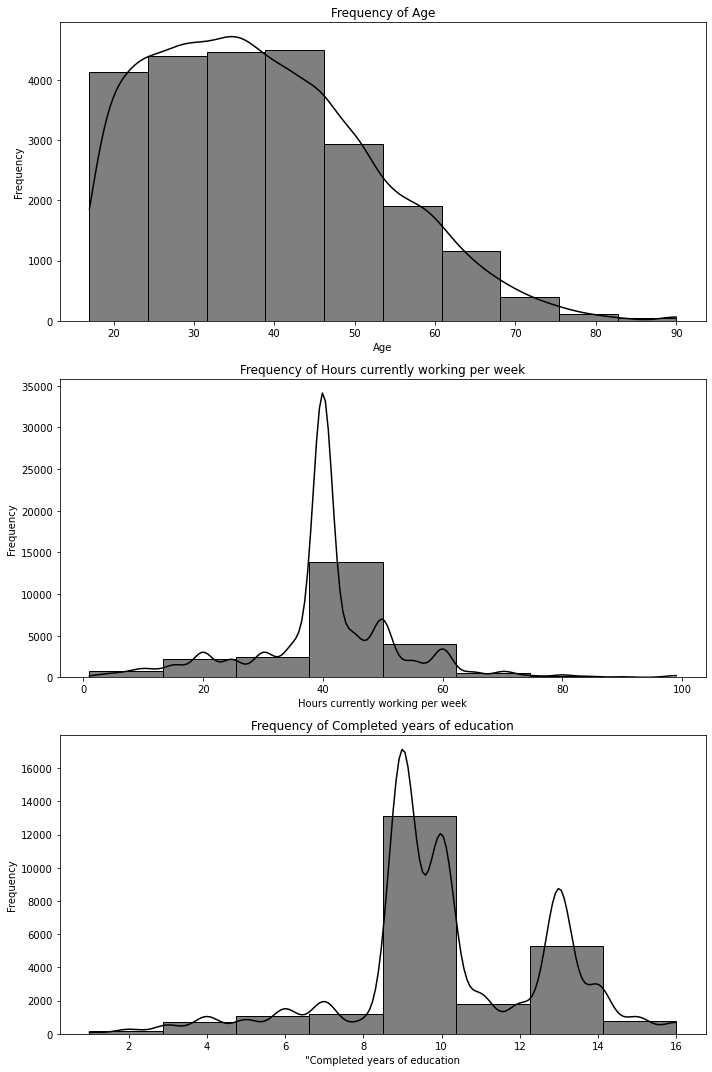


The data from final datasets describes categorical variables.
****************************************************************************************************
             Jobs Type of employment Highest level of education  \
count       24066              24066                      24066   
unique          4                  2                          4   
top     Secondary            Private        Associate/Bachelors   
freq        10967              20853                      11610   

          Marital status Relationship inside the household Ethnic Origin  \
count              24066                             24066         24066   
unique                 2                                 2             4   
top     single household                           Nucleas         White   
freq               13012                             14634         20563   

       Gender Country of birth Salary Range  
count   24066            24066        24066  
unique      2              

In [2]:
#Import pandas and sklearn libraries requiered
#Import specific packages from sklearn library
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.formula.api as smf 
###################     Defined headers name   #################################
headers = ["Age", "Jobs", "Type of employment", \
           "Hours currently working per week", "Capital status", \
           "Highest level of education", "Completed years of education", \
           "Marital status", "Relationship inside the household", \
           "Ethnic Origin", "Gender", "Country of birth", "Salary Range"]

################## Import the csv file and give the headers ###############
ds_org = pd.read_csv(r'Team 12 - US Census Above 50k Predictor.csv',
                       header = None,
                       names = headers)

#####    The basic information for the orginal datasets    ###########
print(f"""
The basic descriptive information from orginal datasets
{'*' * 100 }""")
print(ds_org.info())

##################    The descriptive data for numberic variables    ##################################
print(f"""
The data from orginal datasets describes numeric variables
{'*' * 100 }""")

print(ds_org.describe(include = 'number').round(decimals = 2))

##################    The descriptive data for categorical variables    ##################################
print(f"""
The data from orginal datasets describes categorical variables.
Unique shows that how many values each categorical variable has.
{'*' * 100 }""")
print(ds_org.describe(include = 'object'))

#Frequency of each of the following features:
###"Jobs", "Type of employment", "Highest level of education", "Marital status"
### "Relationship inside the household" "Ethnic Origin", "Gender",
###"Country of birth", "Salary Range""


print(f"""
The frequency of each of the categorical values
{'*' * 100 }
    
{ds_org["Jobs"].value_counts(normalize = False,
                             sort      = True,
                             ascending = False)}

{'*' * 100 }

{ds_org["Type of employment"].value_counts(normalize = False,
                                           sort      = True,
                                           ascending = False)}

{'*' * 100 }

{ds_org["Highest level of education"].value_counts(normalize = False,
                                         sort      = True,
                                         ascending = False)}

{'*' * 100 }

{ds_org["Marital status"].value_counts(normalize = False,
                                         sort      = True,
                                         ascending = False)}

{'*' * 100 }

{ds_org["Relationship inside the household"].value_counts(normalize = False,
                                         sort      = True,
                                         ascending = False)}

{'*' * 100 }

{ds_org["Ethnic Origin"].value_counts(normalize = False,
                                         sort      = True,
                                         ascending = False)}

{'*' * 100 }

{ds_org["Gender"].value_counts(normalize = False,
                                         sort      = True,
                                         ascending = False)}

{'*' * 100 }

{ds_org["Country of birth"].value_counts(normalize = False,
                                         sort      = True,
                                         ascending = False)}

{'*' * 100 }

{ds_org["Salary Range"].value_counts(normalize = False,
                                         sort      = True,
                                         ascending = False)}

      """)
# Define ' ?' as a null value in our data set.
#import a new datasets to check null 
ds_for_null = pd.read_csv(r'Team 12 - US Census Above 50k Predictor.csv',
                          header = None,
                          names = headers,
                          na_values=' ?')

#check dataset's basic information 
print(f"""
Check basic information
{'*' * 100 }""")

print(ds_for_null.info())


#Check total missing values in each feature
print(f"""
Check any variables has missing values
{'*' * 100 }

All Missing Value Counts:
------------------------------
{ds_for_null.isnull().sum(axis = 0)}

""")

#Create a new column for the variable Income.
ds_for_null["y"] = ds_for_null.loc[ : , "Salary Range"]

#Create the dummy column for the "y"
ds_for_null = pd.get_dummies(ds_for_null,columns=["y"],drop_first = True)

#subset the original dataset by y varaiable from the data from the salary more than 50K
ds_high = ds_for_null.loc[ : ,["Jobs","Type of employment","Country of birth" ]] \
         [ds_for_null.loc[: , "y_ >50K"] == 1]

#subset the original dataset by y varaiable from the data from the salary lower than 50K
ds_low = ds_for_null.loc[ : ,["Jobs","Type of employment","Country of birth" ]] \
        [ds_for_null.loc[: , "y_ >50K"] == 0]

#Create a List that have Mode, and make sure the mode is a string
mode_high = ds_high[["Jobs","Type of employment","Country of birth" ]].mode()
mode_low = ds_low[["Jobs","Type of employment","Country of birth" ]].mode()

#Mode for the data that from the salary more than 50K Range
print(f"""
Mode for the data that from the salary more than 50K Range 
{'*' * 100 }""")
print(mode_high)

#Mode for the data that from the salary not more than 50K Range
print(f"""
Mode for the data that from the salary not more than 50K Range 
{'*' * 100 }""")
print(mode_low)

#Create a loop to input the different mode for the jobs columns
for element in ds_for_null["y_ >50K"]:
    if element == 1:
        ds_for_null['Jobs'].fillna(mode_high.iloc[0,0], inplace=True)
    else:
        ds_for_null['Jobs'].fillna(mode_low.iloc[0,0], inplace=True)

#New frequency after fill the missing value.
print(f"""
The frequency of the categorical varaiables that already added missing value.
{'*' * 100 }
    
{ds_for_null["Jobs"].value_counts(normalize = True,
                                  sort      = True,
                                  ascending = False).round(decimals =3)}

{'*' * 100 }

{ds_for_null["Type of employment"].value_counts(normalize = True,
                                                sort      = True,
                                                ascending = False).round(decimals =3)}

{'*' * 100 }

{ds_for_null["Country of birth"].value_counts(normalize = True,
                                              sort      = True,
                                              ascending = False).round(decimals =5)}

""")

        
#Place the mode value of the feature 'Type of employment
ds_for_null['Type of employment'].fillna(mode_high.iloc[0,1], inplace=True)
#Place the mode value of the feature 'Type of employment
ds_for_null['Country of birth'].fillna(mode_high.iloc[0,2], inplace=True)

#Subset a categorical variables for further analysis
#After doing the regression on the Python, we choose gender to get dummies.
ds_for_null["gender"] =ds_for_null.loc[: , "Gender"]

#Create dummy for the following categorical variables
ds_for_null = pd.get_dummies(ds_for_null,columns=["gender"],drop_first = True)

################################      Histogram  Plot       ############################
###The team do plot for "Age","Hours currently working per week","Completed years of education"
##We do not do plot for "Capital Status" because we think the orginal data are range already.
print(f"""
Histogram Plot for "Age","Hours currently working per week","Completed years of education"
{'*' * 100 }      
      """)

#########################
## Setting Figure Size ##
#########################

#Setting figure size
fig, ax = plt.subplots(figsize = [10, 15])


###########################
## Plotting First Visual ##
###########################

#Plotting multiple visuals in the same plot area
plt.subplot(3, 1, 1) # 3 rows, 1 column, space 1

# histogram for Age
sns.histplot(data  = ds_for_null,
             x     ='Age',
             bins  = 10,
             kde   = True,
             color = 'black')


# titles and axis labels
plt.title(label = "Frequency of Age")
plt.xlabel(xlabel = 'Age')
plt.ylabel(ylabel = 'Frequency')


############################
## Plotting Second Visual ##
############################

# plot area 2
plt.subplot(3, 1, 2) # 3 rows, 1 column, space 2



# histogram for Hours currently working per week
sns.histplot(data  = ds_for_null,
             x     ='Hours currently working per week',
             bins  = 8,
             kde   = True,
             color = 'black')


#titles and axis labels
plt.title(label = "Frequency of Hours currently working per week")
plt.xlabel(xlabel = 'Hours currently working per week')
plt.ylabel(ylabel = 'Frequency')


###########################
## Plotting Third Visual ##
###########################

# plot area 3
plt.subplot(3, 1, 3) # 3 rows, 1 column, space 3

# histogram for Completed years of education
sns.histplot(data  = ds_for_null,
             x     ='Completed years of education',
             bins  = 8,
             kde   = True,
             color = 'black')


# titles and axis labels
plt.title(label = "Frequency of Completed years of education")
plt.xlabel(xlabel = '"Completed years of education')
plt.ylabel(ylabel = 'Frequency')

#These compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

######################   Create New Bin for numerical varaiables   ###############
###########   Bins for Age   ##########################
Age_Bin=[0,19,25,35,45,99]
Age_bin_lable=[0,1,2,3,4]
ds_for_null['Age Bins'] = pd.cut(ds_for_null['Age'], 
                                 bins = Age_Bin,
                                 labels = Age_bin_lable)

###########   Bins for Hours currently working per week   ##########################
Hoursworking_Bin=[0,25,40,65,110]
Hoursworking_bin_lable=[0,1,2,3]
ds_for_null['Hoursworking per week Bins'] = pd.cut(ds_for_null['Hours currently working per week'], 
                                                   bins = Hoursworking_Bin,
                                                   labels = Hoursworking_bin_lable)


###########   Bins for Completed years of education   ##########################
education_Bin=[0,10,15,19,99]
education_bin_lable=[0,1,2,3]
ds_for_null['Completed years of education Bins'] = pd.cut(ds_for_null['Completed years of education'], 
                                                          bins = education_Bin,
                                                          labels = education_bin_lable)


###########   Bins for Capital status   ##########################
Capital_status_Bin=[-5000,-1,9999,24999,39999,10000000]
Capital_status_lable=[0,1,2,3,4]
ds_for_null['Capital status Bins'] = pd.cut(ds_for_null['Capital status'], 
                                            bins = Capital_status_Bin,
                                            labels = Capital_status_lable)

#########################   Transform categorical variables   ##########################
############   Tranform Jobs   ###########
jobs = {' Exec-managerial'  : 'Tertiary',
        ' Craft-repair'     : 'Secondary', 
        ' Prof-specialty'   : 'Tertiary',
        ' Machine-op-inspct': 'Secondary', 
        ' Transport-moving' : 'Secondary', 
        ' Sales'            : 'Tertiary',
        ' Adm-clerical'     : 'Secondary', 
        ' Handlers-cleaners': 'Secondary' , 
        ' Other-service'    : 'Other',
        ' Protective-serv'  : 'Tertiary', 
        ' Farming-fishing'  : 'Primary',
        ' Tech-support'     : 'Tertiary',
        ' Armed-Forces'     : 'Tertiary', 
        ' Priv-house-serv'  : 'Secondary'}
ds_for_null['Jobs']=ds_for_null['Jobs'].map(jobs)

############   Tranform Type of employment   ######################
employment = {' Private':'Private', 
              ' Self-emp-not-inc':'Private', 
              ' Local-gov':'Government', 
              ' State-gov':'Government',
              ' Self-emp-inc':'Private', 
              ' Federal-gov':'Government', 
              ' Without-pay':'Private', 
              ' Never-worked':'Private'}
ds_for_null['Type of employment']=ds_for_null['Type of employment'].map(employment)

#################   Tranform Highest level of education   ######################
education = {' Some-college':'Associate/Bachelors',
             ' 7th-8th':'Pre-12',
             ' Doctorate':'Masters & PHD', 
             ' 10th':'Pre-12', 
             ' 9th':'Pre-12',
             ' Bachelors':'Associate/Bachelors', 
             ' Masters':'Masters & PHD', 
             ' HS-grad':'HS Grad', 
             ' 1st-4th':'Pre-12', 
             ' Assoc-acdm':'Associate/Bachelors',
             ' Prof-school':'Associate/Bachelors', 
             ' Assoc-voc':'Associate/Bachelors', 
             ' 11th':'Pre-12', 
             ' 5th-6th':'Pre-12', 
             ' Preschool':'Pre-12',
             ' 12th':'Pre-12'}
ds_for_null['Highest level of education']=ds_for_null['Highest level of education'].map(education)

#################    Tranform Marital status    ######################
marital = {' Widowed':'single household', 
           ' Married-civ-spouse':'dual household',
           ' Divorced':'single household', 
           ' Never-married':'single household',
           ' Separated':'single household', 
           ' Married-spouse-absent':'single household', 
           ' Married-AF-spouse':'dual household'}
ds_for_null['Marital status']=ds_for_null['Marital status'].map(marital)

#################    Tranform Relationship inside the household   ######################
relationship = {' Unmarried':'Non-nucleas', 
                ' Husband':'Nucleas', 
                ' Not-in-family':'Non-nucleas', 
                ' Wife':'Nucleas', 
                ' Own-child':'Nucleas',
                ' Other-relative':'Non-nucleas'}
ds_for_null['Relationship inside the household']=ds_for_null['Relationship inside the household'].map(relationship)

#################     Tranform Ethnic Origin    ######################
ethnic = {' White':'White', 
          ' Black':'Black', 
          ' Amer-Indian-Eskimo':'The other', 
          ' Asian-Pac-Islander':'Asian-Pac-Islander',
          ' Other':'The other'}
ds_for_null['Ethnic Origin']=ds_for_null['Ethnic Origin'].map(ethnic)

############    Tranform Country of birth     ######################
country = {' United-States':'United-States', 
           ' Vietnam':'Other', 
           ' China':'Other', 
           ' India':'Other', 
           ' Cambodia':'Other',
           ' Puerto-Rico':'United-States', 
           ' Mexico':'Mexico', 
           ' Germany':'Other', 
           ' Italy':'Other',
           ' Dominican-Republic':'Other', 
           ' Greece':'Other', 
           ' Canada':'Other', 
           ' England':'Other', 
           ' France':'Other',
           ' Hungary':'Other', 
           ' Iran':'Other',  
           ' Nicaragua':'Other', 
           ' Peru':'Other', 
           ' Philippines':'Other',
           ' Guatemala':'Other', 
           ' Taiwan':'Other', 
           ' Poland':'Other', 
           ' Japan':'Other', 
           ' Honduras':'Other',
           ' South':'Other', 
           ' Ecuador':'Other', 
           ' Columbia':'Other', 
           ' Scotland':'Other', 
           ' El-Salvador':'Other',
           ' Trinadad&Tobago':'Other', 
           ' Jamaica':'Other', 
           ' Hong':'Other', 
           ' Portugal':'Other',
           ' Yugoslavia':'Other', 
           ' Cuba':'Other', 
           ' Laos':'Other', 
           ' Outlying-US(Guam-USVI-etc)':'United-States',
           ' Haiti':'Other', 
           ' Ireland':'Other',
           ' Thailand':'Other', 
           ' Holand-Netherlands':'Other'}
ds_for_null['Country of birth']=ds_for_null['Country of birth'].map(country)

######          Check The descriptive data for categorical variables after changes  #############
print(f"""
The data from final datasets describes categorical variables.
{'*' * 100 }""")
print(ds_for_null.describe(include = 'object'))

#After transform all the data,we begin split the datasets
##############################      Train and Test Data       ##################################
#Split features and y columns.
features = ds_for_null.drop(["Salary Range", "y_ >50K"],axis = 1)
y = ds_for_null.loc[:,"y_ >50K"]

#split data in to train and test group
train_features,test_features,train_y,test_y = train_test_split(features,y,test_size = .25,random_state = 100)

# merge train_features and train_y so that they can be used in one model
datasets_train = pd.concat([train_features, train_y], axis = 1)
# merge x_test and y_test so that they can be used in one model
datasets_test = pd.concat([test_features, test_y], axis = 1)

#############################        Export CSV file         ###################################
# saving the training set as an CSV file
datasets_train.to_csv(r'datasets_train.csv')

# saving the testing set as an CSV file
datasets_test.to_csv(r'datasets_test.csv')

#Showing the CSV file is successfully saved.
print('Train Dataset and Test Datasets are written to csv File successfully.')

In [3]:
# saving the training set as an Excel file
datasets_train.to_excel(excel_writer = "datasets_train.xlsx",
                        index        = False)

# saving the testing set as an Excel file
datasets_test.to_excel(excel_writer = "datasets_test.xlsx",
                       index        = False)


#Showing the Excel file is successfully saved.
print('Train_Features is written to Excel File successfully.')

Train_Features is written to Excel File successfully.
